<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M6_Performing_a_Big_Data_workflow_with_Spark_Into.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
Apache Spark is an open-source distributed computing system that provides an interface for programming entire clusters with implicit data parallelism and fault tolerance. It is designed to handle large datasets by distributing the data and computation across a cluster of computers. In this tutorial, we will be using PySpark, the Python API for Spark, to perform a big data workflow.

#A few word about Apache Spark
Apache Spark started as a research project at the University of California, Berkeley in 2009 and it is an open source project written mostly in Scala. In a nutshell, Apache Spark is a fast and general engine for large-scale data processing.
Spark’s main property is in-memory processing, but you can also process data on disk and it can be fully integrated with Hadoop to process data from HDFS. Spark provides three main API, in  Java, Scala and Python. 
Spark offers an abstraction called resilient distributed datasets (RDDs),  which are  immutable and lazy data collections partitioned across the nodes of a cluster.

MLlib is a standard component of Spark providing machine learning primitives on top of Spark which contains common algorithms (regression, classification, recommendation, optimization, clustering..), and also basic statistics and feature extraction functions.

If you want to get a better look at Apache Spark and its ecosystem, just check out the web site Apache Spark and its documentation.

In [ ]:
!pip install pyspark --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.7 MB/s eta 0:00:00


#Step 1: Setup
Let's import the necessary modules and create a SparkSession, which is the entry point to programming Spark with the DataFrame and Dataset APIs:

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Big Data Workflow with Spark") \
    .getOrCreate()

#Step 2: Load Data
Next, let's load some data into Spark. We'll be using the Iris dataset, which is a well-known dataset in machine learning. 

In [ ]:
from pyspark import SparkFiles

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
spark.sparkContext.addFile(url)

df = spark.read.csv(SparkFiles.get("iris.data"), header=False, inferSchema=True)
df.show()


+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



#Step 3: Data Preprocessing
Now that we have our data loaded into Spark, we can start preprocessing it. In this step, we will be renaming the columns and removing any null values.

In [ ]:
df = df.toDF("sepal_length", "sepal_width", "petal_length", "petal_width", "class")
df = df.dropna()

df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

#Step 4: Data Exploration
Let's explore our data a bit. We can use the describe() method to get some basic statistics about each column.

In [ ]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|         class|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



#Step 5: Data Analysis
Now we can perform some data analysis. Let's group our data by class and calculate the average sepal length for each class.

In [ ]:
from pyspark.sql.functions import avg

avg_sepal_length = df.groupBy("class").agg(avg("sepal_length"))
avg_sepal_length.show()


+---------------+-----------------+
|          class|avg(sepal_length)|
+---------------+-----------------+
| Iris-virginica|6.587999999999998|
|    Iris-setosa|5.005999999999999|
|Iris-versicolor|            5.936|
+---------------+-----------------+



#Step 6: Data Visualization
Finally, let's visualize our data. We'll be using the matplotlib library to create a scatter plot of the sepal length and width.

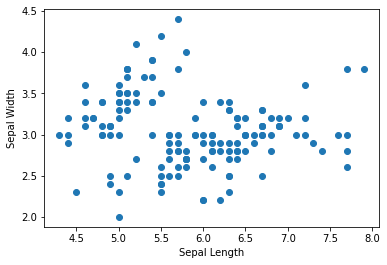

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.select("sepal_length").collect(),
            df.select("sepal_width").collect())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


#Conclusion
That's it! In this tutorial, we covered the basics of performing a big data workflow with Spark in Python. We loaded data, preprocessed it, explored it, analyzed it, and visualized it. Spark is a powerful tool for handling big data, and with PySpark, we can easily interface with it in Python.